In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

In [5]:
df= pd.read_csv(r'D:\priya\Steel_industry_data.csv') 
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


In [7]:

df['CO2(tCO2)'] = df.apply(lambda row: row['Usage_kWh'] * 0.5 if row['CO2(tCO2)'] == 0 else row['CO2(tCO2)'], axis=1)
df['Leading_Current_Reactive_Power_kVarh'] = df['Leading_Current_Reactive_Power_kVarh'].replace(0, df['Leading_Current_Reactive_Power_kVarh'].median())  


In [8]:
df.drop(columns=['date'], inplace=True)

In [9]:
df = pd.get_dummies(df, columns=['WeekStatus', 'Day_of_week', 'Load_Type'], drop_first=True)

In [10]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

In [25]:

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)

print(kmeans.cluster_centers_)
print(kmeans.labels_)


[[ 1.10232393e+00  9.54396964e-01 -4.48168938e-01 -6.01341745e-01
   5.43583829e-01  5.07190601e-01  3.88925692e-01 -3.95949039e-01
   9.87318580e-02 -1.72023640e-01 -3.39307659e-01  1.27326710e-01
   1.04564058e-01  6.97758537e-02  7.17934777e-01  2.84439915e-01]
 [-6.86880257e-01 -4.79633490e-01 -5.13106652e-01  2.97696043e-01
  -1.05136158e+00  4.99413513e-01 -7.38136714e-01  3.92810120e-02
  -6.52389986e-04  2.07170950e-02  3.00106727e-02 -1.60531471e-02
  -8.98194668e-03 -1.08002554e-02 -4.89980093e-01 -5.15453006e-01]
 [-6.56345995e-01 -7.83925475e-01  1.75186052e+00  5.02382531e-01
   1.01193276e+00 -1.83026669e+00  6.97604157e-01  6.24532906e-01
  -1.72864750e-01  2.64491288e-01  5.42034780e-01 -1.94421009e-01
  -1.67537533e-01 -1.02790006e-01 -3.47596206e-01  4.64496696e-01]]
[1 1 1 ... 1 1 1]


In [28]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

In [29]:
silhouette_avg = silhouette_score(scaled_features, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.2423425558870173


In [30]:
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary[['Usage_kWh', 'CO2(tCO2)', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh']])


         Usage_kWh  CO2(tCO2)  Lagging_Current_Reactive.Power_kVarh  \
Cluster                                                               
0        64.252906   0.052723                             28.597558   
1         4.414936   1.730428                              5.214591   
2         5.436121   2.112396                              0.252877   

         Leading_Current_Reactive_Power_kVarh  
Cluster                                        
0                                    0.543583  
1                                    0.061462  
2                                   16.877386  


In [31]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)



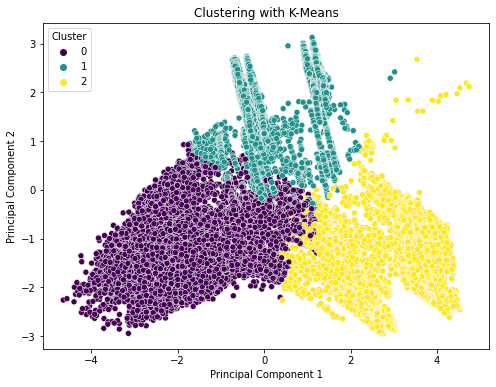

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=df['Cluster'], palette='viridis')
plt.title("Clustering with K-Means")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [33]:
high_usage_cluster = cluster_summary[cluster_summary['Usage_kWh'] > cluster_summary['Usage_kWh'].median()]
high_co2_cluster = cluster_summary[cluster_summary['CO2(tCO2)'] > cluster_summary['CO2(tCO2)'].median()]


In [34]:
print("Clusters with high energy usage:")
print(high_usage_cluster)

Clusters with high energy usage:
         Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
Cluster                                                    
0        64.252906                             28.597558   

         Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
Cluster                                                    
0                                    0.543583   0.052723   

         Lagging_Current_Power_Factor  Leading_Current_Power_Factor  \
Cluster                                                               
0                           90.863234                     99.814918   

                  NSM  WeekStatus_Weekend  Day_of_week_Monday  \
Cluster                                                         
0        52449.876154            0.106207            0.179989   

         Day_of_week_Saturday  Day_of_week_Sunday  Day_of_week_Thursday  \
Cluster                                                                   
0                    0.082339            0.02

In [35]:
print("Clusters with high CO2 emissions:")
print(high_co2_cluster)

Clusters with high CO2 emissions:
         Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
Cluster                                                    
2         5.436121                              0.252877   

         Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
Cluster                                                    
2                                   16.877386   2.112396   

         Lagging_Current_Power_Factor  Leading_Current_Power_Factor  \
Cluster                                                               
2                           99.724889                     28.625083   

                  NSM  WeekStatus_Weekend  Day_of_week_Monday  \
Cluster                                                         
2        60148.372155            0.566834            0.084304   

         Day_of_week_Saturday  Day_of_week_Sunday  Day_of_week_Thursday  \
Cluster                                                                   
2                    0.234913            0.3

In [36]:
df['Lagging_Current_Reactive.Power_kVarh'] = df.apply(
    lambda row: row['Lagging_Current_Reactive.Power_kVarh'] * 0.9 if row['Cluster'] == 1 else row['Lagging_Current_Reactive.Power_kVarh'],
    axis=1
)


In [37]:
df['Usage_kWh'] = df.apply(
    lambda row: row['Usage_kWh'] * 0.95 if row['Cluster'] == 1 else row['Usage_kWh'],  
    axis=1
)

In [38]:
df['CO2(tCO2)'] = df.apply(
    lambda row: row['CO2(tCO2)'] * 0.9 if row['Cluster'] == 1 else row['CO2(tCO2)'],  
    axis=1
)

In [39]:
silhouette_avg_after = silhouette_score(scaled_features, df['Cluster'])
print(f"Silhouette Score after optimization: {silhouette_avg_after}")

Silhouette Score after optimization: 0.2423425558870173


In [40]:
cluster_summary_after = df.groupby('Cluster').mean()
print(cluster_summary_after[['Usage_kWh', 'CO2(tCO2)', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh']])


         Usage_kWh  CO2(tCO2)  Lagging_Current_Reactive.Power_kVarh  \
Cluster                                                               
0        64.252906   0.052723                             28.597558   
1         4.194189   1.557385                              4.693132   
2         5.436121   2.112396                              0.252877   

         Leading_Current_Reactive_Power_kVarh  
Cluster                                        
0                                    0.543583  
1                                    0.061462  
2                                   16.877386  


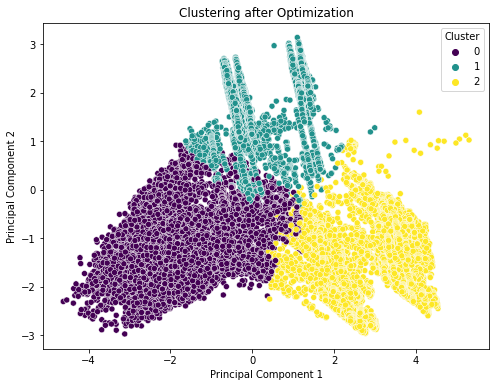

In [41]:
principal_components_after = pca.fit_transform(scaler.fit_transform(df.drop(columns=['Cluster'])))
plt.figure(figsize=(8, 6))
sns.scatterplot(x=principal_components_after[:, 0], y=principal_components_after[:, 1], hue=df['Cluster'], palette='viridis')
plt.title("Clustering after Optimization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()